In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load Dataset

In [11]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [12]:
train_df.shape

(60000, 785)

In [13]:
test_df.shape

(10000, 785)

In [14]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [15]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

#### Each row represents an grayscale image containing 784 pixels and each pixel having values in range from 0-255  
#### The column label is a discrete value in the range 0 to 9 each value representing a specific category

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Preprocess Data  
Convert each image of 784 into (28x28x1)(height x width x color_channels). Divide values by 255 to scale the values.

In [17]:
x_train = train_df.iloc[:,1:].to_numpy()
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train / 255

In [18]:
y_train = train_df.iloc[:,0].to_numpy()

In [19]:
x_test = test_df.iloc[:,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test / 255

In [20]:
y_test = test_df.iloc[:,0].to_numpy()

### Visualization

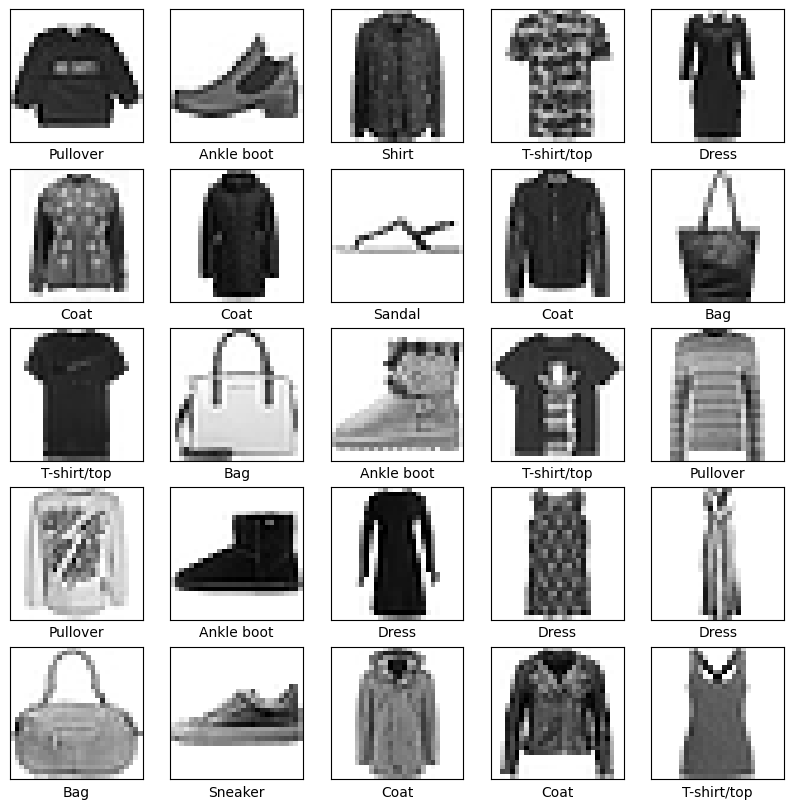

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Model Building

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [23]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       346,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,114 (1.32 MB)

 Trainable params: 347,114 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(x_train,y_train,epochs=50,batch_size=1200,validation_split=0.05)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5848 - loss: 1.3150 - val_accuracy: 0.8000 - val_loss: 0.5542
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8273 - loss: 0.4930 - val_accuracy: 0.8547 - val_loss: 0.4283
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8583 - loss: 0.4101 - val_accuracy: 0.8590 - val_loss: 0.3952
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8731 - loss: 0.3704 - val_accuracy: 0.8750 - val_loss: 0.3621
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.8762 - loss: 0.3530 - val_accuracy: 0.8853 - val_loss: 0.3432
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8858 - loss: 0.3298 - val_accuracy: 0.8837 - val_loss: 0.3358
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.8891 - loss: 0.3166 - val_accuracy: 0.8940 - val_loss: 0.3161
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8946 - loss: 0.3075 - val_accuracy: 0.8843 - val_loss:

### Evaluation

In [25]:
evaluation = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9161 - loss: 0.2363


In [26]:
print(f"Accuracy: {evaluation[1]}")

Accuracy: 0.9197999835014343


In [27]:
y_probas = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [28]:
y_pred = y_probas.argmax(axis=-1)

In [29]:
y_pred

array([0, 1, 2, ..., 8, 8, 1])

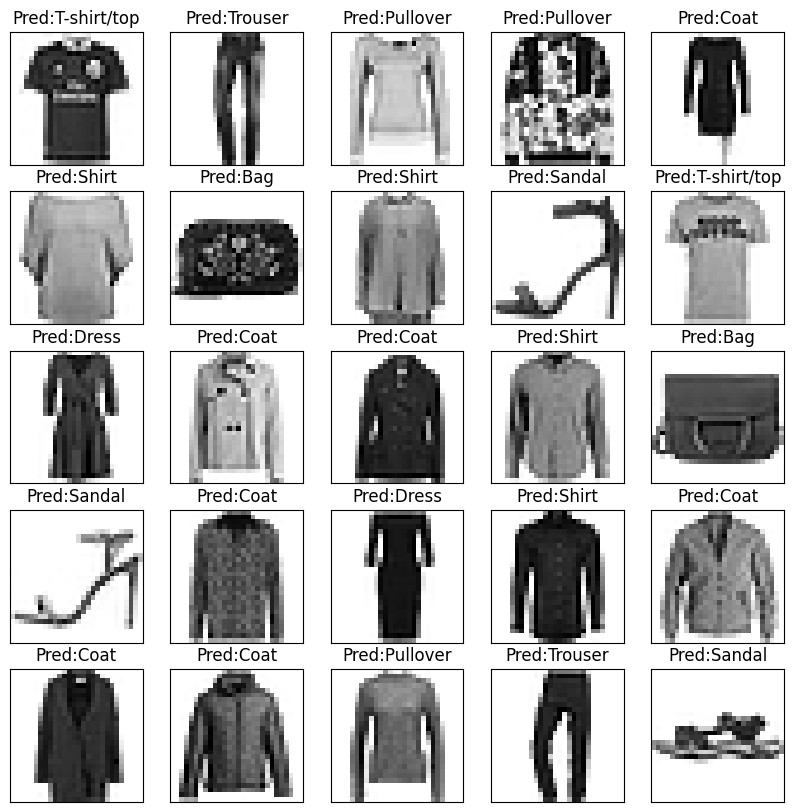

In [30]:
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
#     plt.xlabel(f"True Class:{y_test[i]}")
    plt.title(f"Pred:{class_names[y_pred[i]]}")
plt.show()

In [31]:
from sklearn.metrics import classification_report

In [32]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.86      0.88      0.87      1000
     class 1       0.98      0.99      0.99      1000
     class 2       0.92      0.83      0.87      1000
     class 3       0.92      0.93      0.93      1000
     class 4       0.82      0.95      0.88      1000
     class 5       0.99      0.97      0.98      1000
     class 6       0.82      0.73      0.77      1000
     class 7       0.95      0.98      0.96      1000
     class 8       0.98      0.98      0.98      1000
     class 9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

